# Matplotlib

## Основы

Для начала импортируем модуль MatplotLib.

Нам потребуется один из его подмодулей, который отвечает за плоские графики - Pyplot.

In [1]:
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt

Добавим немного магии, чтобы все генерируемые модулем изображения отображались сразу же после наших ячеек, а не в отдельных окнах браузера.

In [4]:
%matplotlib inline

Работая с Matplotlib мы подразумеваем, что вы уже знаете Numpy.

Тогда простейший график параболы может выглядеть так.
  
 <br>
  
   
Создадим множество x и соответствующих им y:

In [5]:
import numpy as np

x = np.arange(0, 5, 0.1)
y = x**2

Построим график:

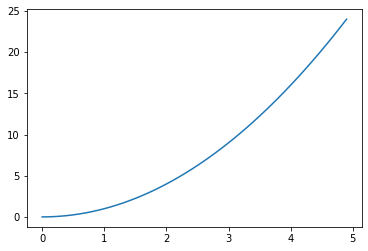

In [6]:
plt.figure()
plt.plot(x, y)
plt.show()

На самом деле нам нужно ещё меньше кода (но результат менее универсальный и имеет некоторые особенности):

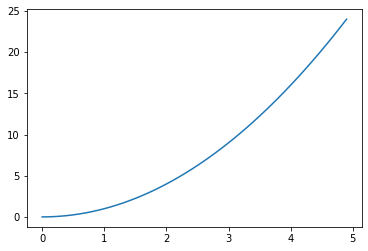

In [9]:
plt.plot(x, y);

Добавим немного оформления (подписи осей, заголовок и поменяем цвет кривой):

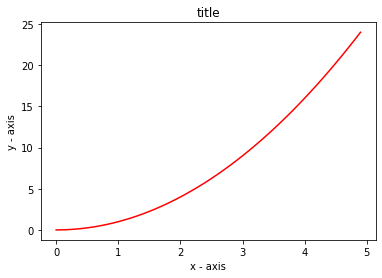

In [12]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('title')
plt.show()

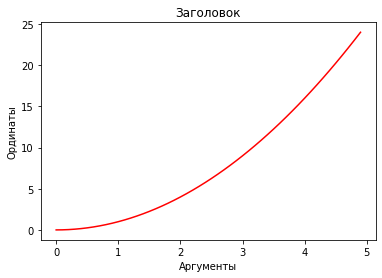

In [10]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('Аргументы')
plt.ylabel('Ординаты')
plt.title('Заголовок')
plt.show()

Заметим, что на самом деле мы построили график по множеству точек, каждая из которых имеет 2 координаты: x, y.
  
 Это значит, что мы можем получить эти точки любым удобным для нас способом и хранить их в любой структуре, например, списке.

In [11]:
x = range(-10, 10)

Воспользуемся лямбда функцией:

In [12]:
y = list(map(lambda x: x**2, x))

In [13]:
print(list(x))
print(y)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[100, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Аналогичный результат с помощью List comprehension:

In [14]:
y = [element**2 for element in x]
print(list(x))
print(y)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[100, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Вновь построим график тем же способом (просто скопируем код):

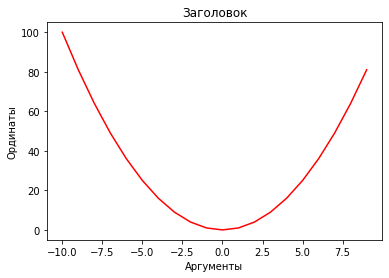

In [15]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel(u'Аргументы')
plt.ylabel(u'Ординаты')
plt.title(u'Заголовок')
plt.show()

Matplotlib настолько умён, что мы можем построить несколько графиков, передавая группы аргументов по очереди прямо в функцию plot. Главное чтобы группы были однотипными.

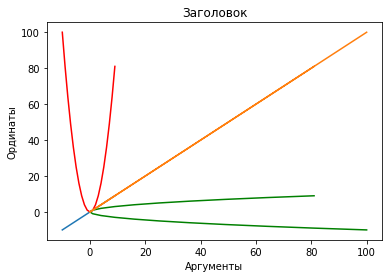

In [18]:
plt.figure()
plt.plot(x, y, 'r', y, x, 'g', x, x, y, y)
plt.xlabel(u'Аргументы')
plt.ylabel(u'Ординаты')
plt.title(u'Заголовок')
plt.show()

Но лучше конечно каждый график выносить в отдельный вызов - так проще потом работать и можно использовать разнородные группы аргументов:

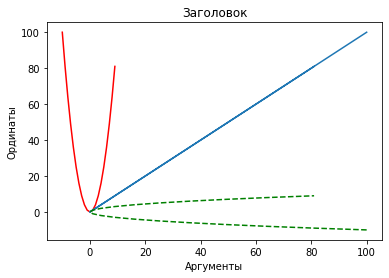

In [30]:
plt.figure()
plt.plot(x, y, 'r')
plt.plot(y, y)
plt.plot(y, x, 'g--')
plt.xlabel(u'Аргументы')
plt.ylabel(u'Ординаты')
plt.title(u'Заголовок')
plt.show()

Поскольку на получившийся график очень мелкий, давайте его увеличим.
Используем аргумент figsize для функции figure.
В него передаём кортеж с размерами нашей фигуры.
1-е значение - ширина в дюймах
2-е значение - высота в дюймах

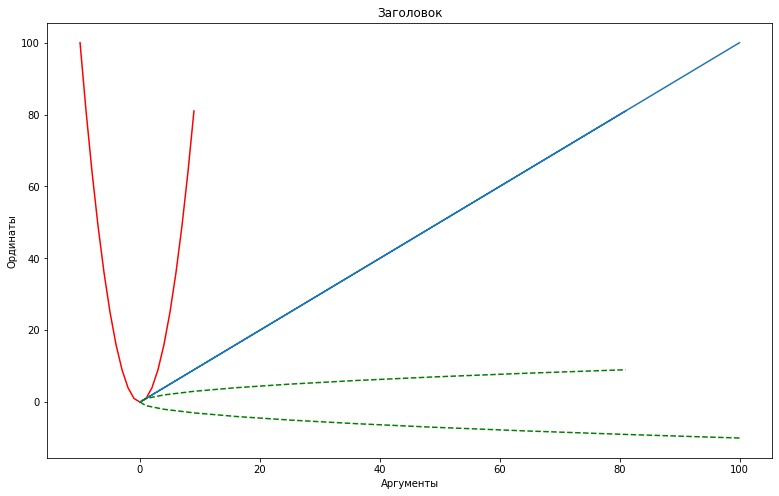

In [19]:
plt.figure(figsize=(13, 8))
plt.plot(x, y, 'r')
plt.plot(y, y)
plt.plot(y, x, 'g--')
plt.xlabel(u'Аргументы')
plt.ylabel(u'Ординаты')
plt.title(u'Заголовок')
plt.show()

Можно задать разрешение картинки в точках на дюйм с помощью аргумента dpi:

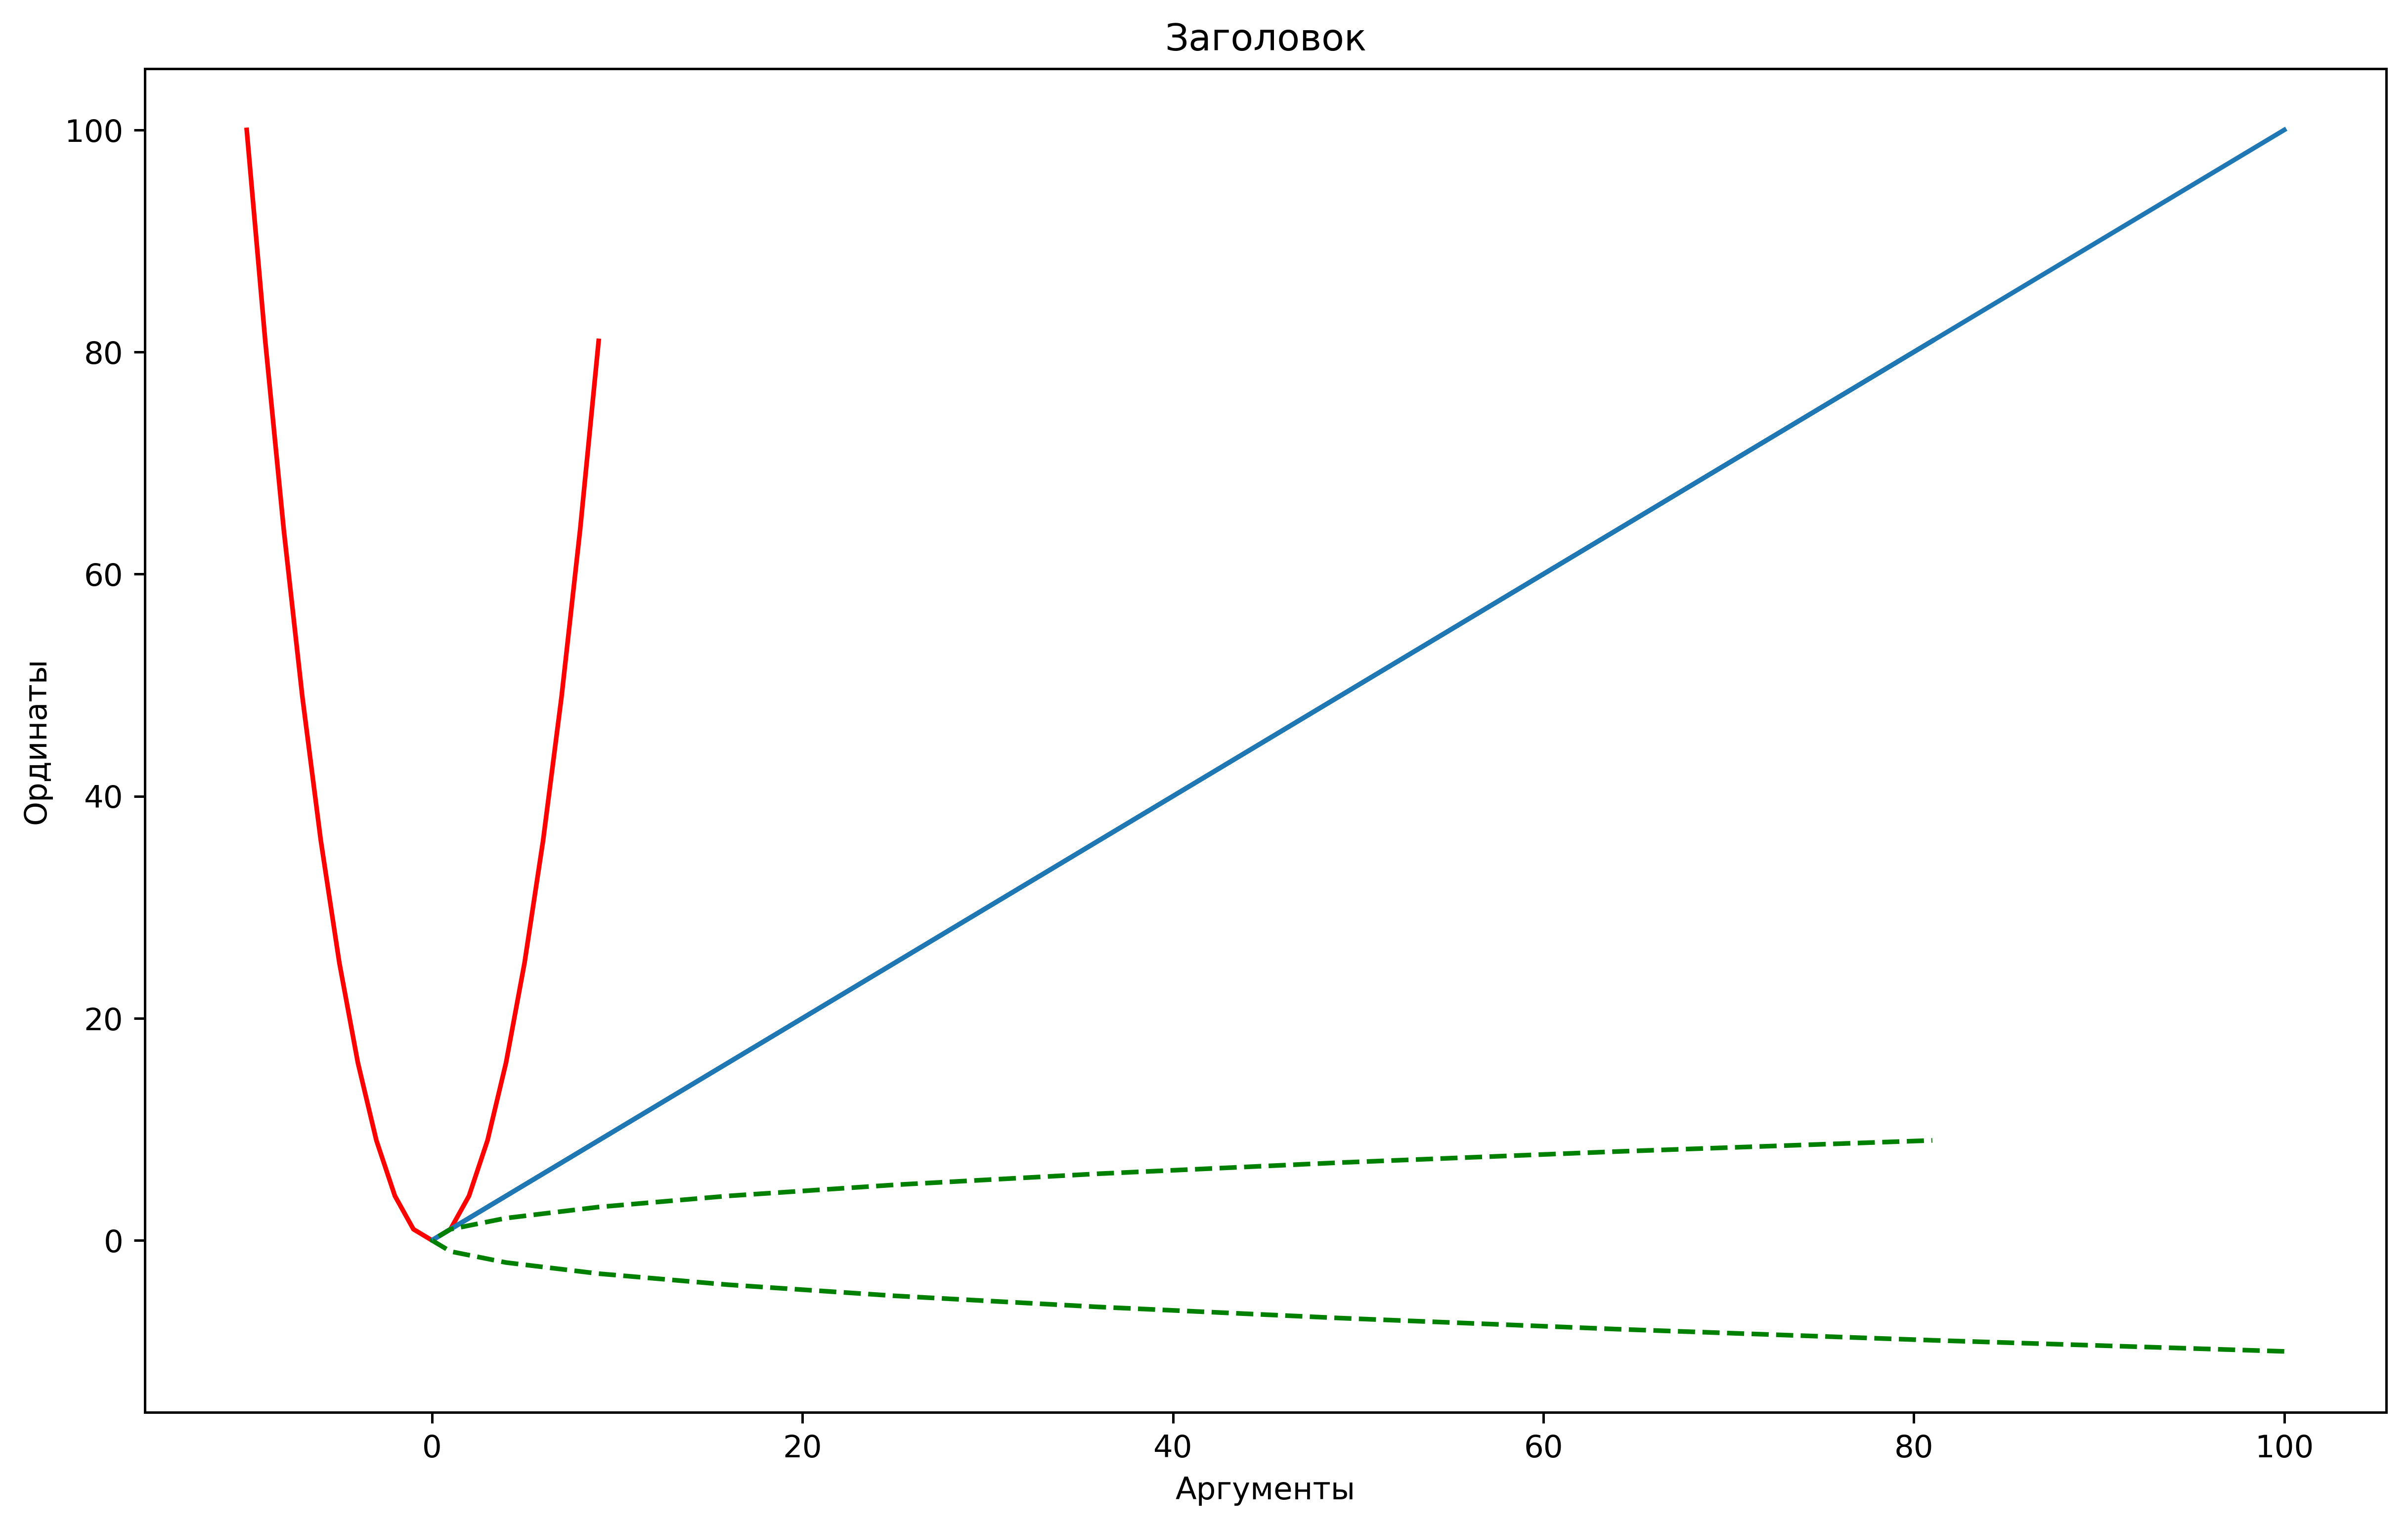

In [21]:
plt.figure(figsize=(13,8), dpi=450)
plt.plot(x, y, 'r')
plt.plot(y, y)
plt.plot(y, x, 'g--')
plt.xlabel(u'Аргументы')
plt.ylabel(u'Ординаты')
plt.title(u'Заголовок')
plt.show()

Так же мы можем не просто выводить файл для показа в ноутбуке, но и сохранить его, использую функцию savefig.

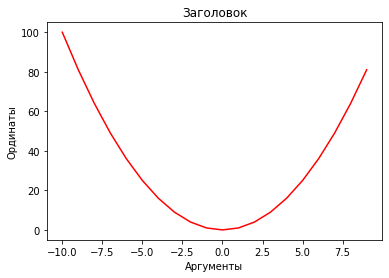

In [22]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel(u'Аргументы')
plt.ylabel(u'Ординаты')
plt.title(u'Заголовок')
plt.savefig('1.png')
plt.savefig('1.svg')

Хорошая новость заключается в том, что matplotlib достаточно умён, чтобы понять тип файла по его расширению и работает с векторной графикой, поэтому мы можем сохранить график в формате svg и получить отличное качество картинки, которую можно будет массштабировать.

## Объекты

Однако, давайте рассмотрим более гибкий способ работы с Matplotlib.

Когда мы используем функцию figure, то она возвращает нам некий объект, сущность, которую можно сохранить в переменную.

In [23]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Условно можно считать, что Фигура - это всё изображение, с которым мы работаем.

И только часть этого изображения будет графиком.

Так часть, которая используется непосредственно для построения графика называется "осями". Важно, что если мы добавляем оси с помощью функции add_axes, то нам надо указать координату левого нижнего угла, ширину и высоту прямоугольника осей в долях от всей фигуры.

Например, оси на 100% фигуры:

/tmp/ipykernel_32121/608466550.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


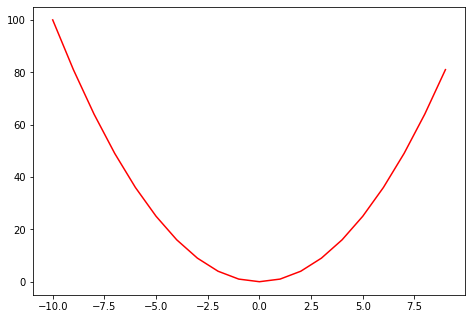

In [26]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1]) 
axes.plot(x, y, 'r')
fig.show();

Это же позволяет на нанести на фигуру столько осей с графиками и в тех местах, где мы захотим, например, один внутри другого:

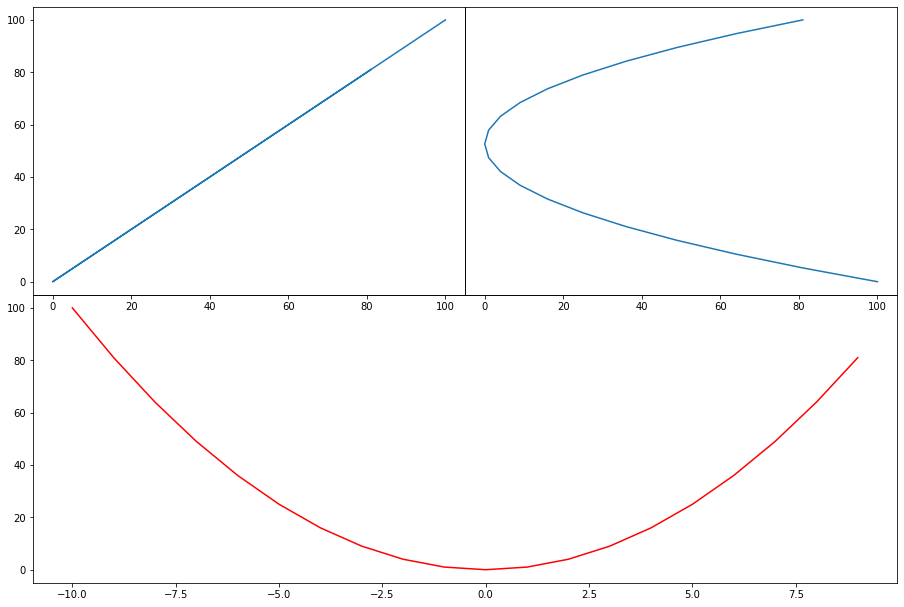

In [30]:
fig = plt.figure()

axes1 = fig.add_axes([0, 0, 2, 1])
axes1.plot(x, y, 'r')

axes2 = fig.add_axes([1, 1, 1, 1])
axes2.plot(y, x)



axes4 = fig.add_axes([0, 1, 1, 1])
axes4.plot(y, y)

Если нам не нужна настолько полная гибкость, а хватит просто возможности рисовать графики, то можно использовать subplots, которая возвращает сразу фигуры и оси:

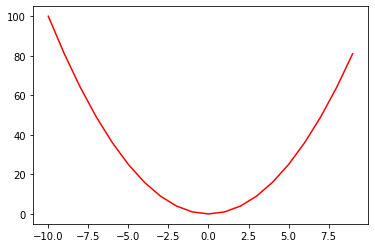

In [55]:
fig, axes = plt.subplots()
axes.plot(x, y, 'r')

Если передать в subplots число, то оно задаст несколько осей одни под другими.

Размер фигуры не будет изменён, а пространство в ней будет разделено между осями "поровну".

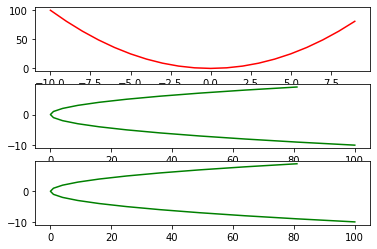

In [31]:
fig, axes = plt.subplots(3)

axes[0].plot(x, y, 'r')
axes[1].plot(y, x, 'g')
axes[2].plot(y, x, 'g')

Если передать 2 числа, то:

 - первым будет число "строк"
 - вторым число "столбцов"

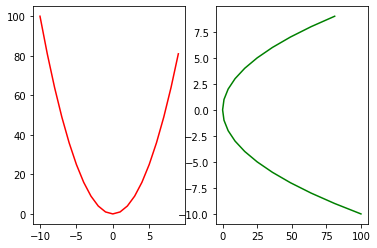

In [24]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(x, y, 'r')
axes[1].plot(y, x, 'g')

Как и для функции figure, для subplots можно задать размер фигуры с помощью figsize

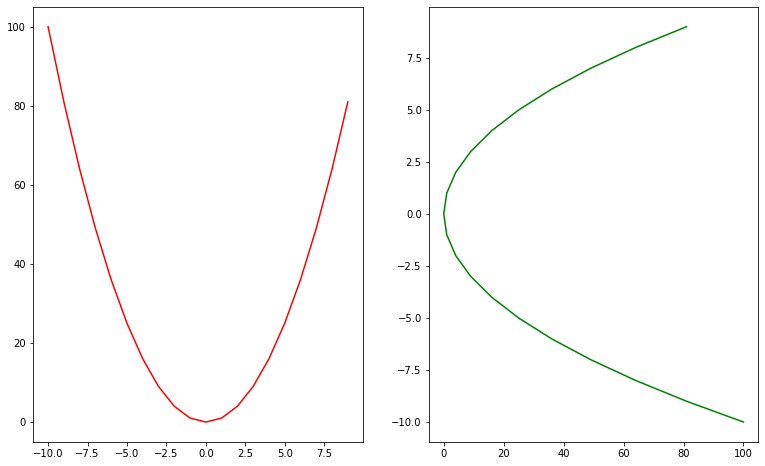

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(13,8))
axes[0].plot(x, y, 'r')
axes[1].plot(y, x, 'g')

Следует быть осторожным с обращением к объектам осей, если ваша фигура представляет из себя матрицу, например, 2 на 2, т.к. оси будут сложены в двумерный массив:

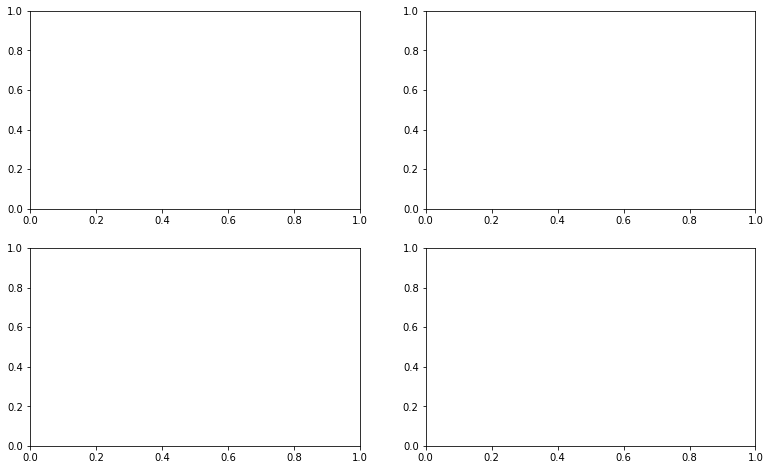

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(13,8))

axes[0][0].plot(x, y, 'r')
axes[0][1].plot(y, x, 'g')

axes[1][0].plot(x, x, 'r')
axes[1][1].plot(y, y, 'g')

А вод подписи к графику придётся сделать иначе, чем раньше.

- set_xlabel вместо xlabel

- set_ylabel вместо ylabel

- set_title вместо title

Text(0.5, 1.0, 'Title')

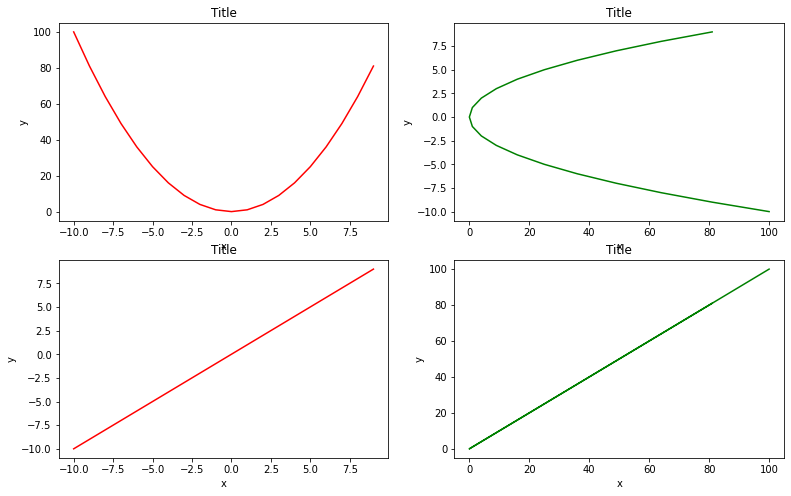

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(13,8))

axes[0][0].plot(x, y, 'r')
axes[0][0].set_xlabel('x')
axes[0][0].set_ylabel('y')
axes[0][0].set_title('Title')

axes[0][1].plot(y, x, 'g')
axes[0][1].set_xlabel('x')
axes[0][1].set_ylabel('y')
axes[0][1].set_title('Title')

axes[1][0].plot(x, x, 'r')
axes[1][0].set_xlabel('x')
axes[1][0].set_ylabel('y')
axes[1][0].set_title('Title')

axes[1][1].plot(y, y, 'g')
axes[1][1].set_xlabel('x')
axes[1][1].set_ylabel('y')
axes[1][1].set_title('Title')

Как плохо, что заголовки и подписи осей кое-где слиплись...

Чтобы это исправить автоматически, можно использовать fig.tight_layout.

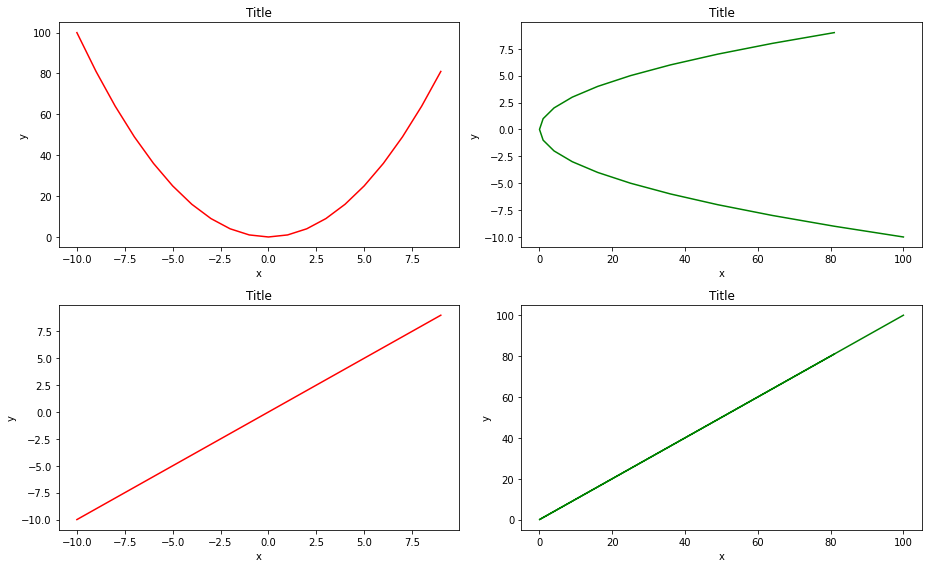

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(13,8))

axes[0][0].plot(x, y, 'r')
axes[0][0].set_xlabel('x')
axes[0][0].set_ylabel('y')
axes[0][0].set_title('Title')

axes[0][1].plot(y, x, 'g')
axes[0][1].set_xlabel('x')
axes[0][1].set_ylabel('y')
axes[0][1].set_title('Title')

axes[1][0].plot(x, x, 'r')
axes[1][0].set_xlabel('x')
axes[1][0].set_ylabel('y')
axes[1][0].set_title('Title')

axes[1][1].plot(y, y, 'g')
axes[1][1].set_xlabel('x')
axes[1][1].set_ylabel('y')
axes[1][1].set_title('Title')

fig.tight_layout()

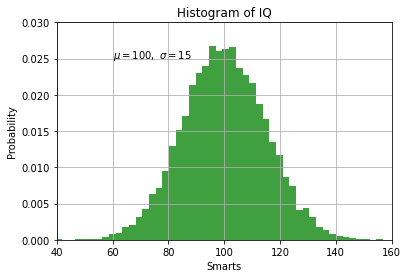

In [37]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

## Легенда

In [38]:
# Создадим пару более интересных функций

x = np.arange(0.1, 5, 0.1)

def f(x):
    return x**2

def g(x):
    return 1/x

def h(x):
    return x*np.sin(x)

Добавим подписи с помощью метода legend. Внутрь передадим список строк, которые являются подписями в том порядке, в котором мы добавляли функции

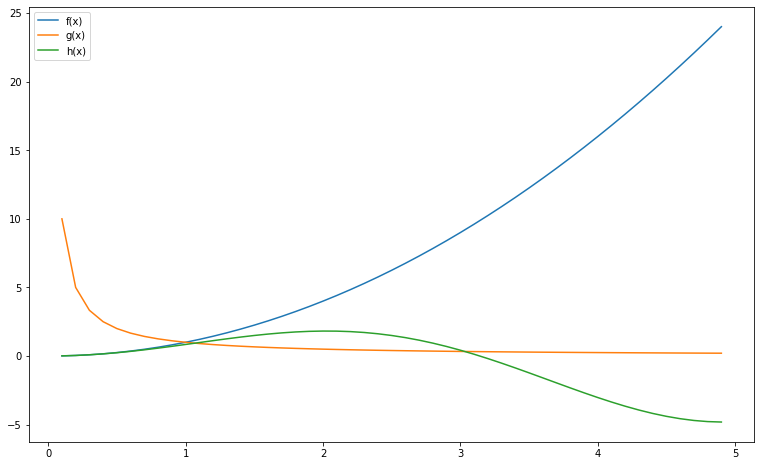

In [39]:
fig, axes = plt.subplots(figsize=(13,8))

axes.plot(x, f(x), x, g(x), x, h(x))

axes.legend(["f(x)", "g(x)", "h(x)"]);

Или подписи можно передавать сразу в функцию plot, используя аргумент label для тех графиков, к которым мы их хотим задать.

Но тогда в конце придётся вызвать функцию legend без параметров.

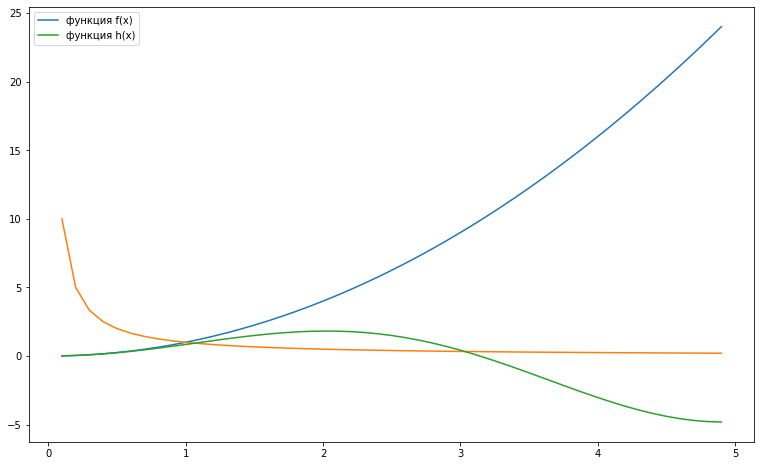

In [31]:
fig, axes = plt.subplots(figsize=(13,8))

axes.plot(x, f(x), label=u'функция f(x)')
axes.plot(x, g(x))
axes.plot(x, h(x), label=u'функция h(x)')

axes.legend();

Метод legend может принимать необязательный параметр loc, который задаёт местонахождение легенды.

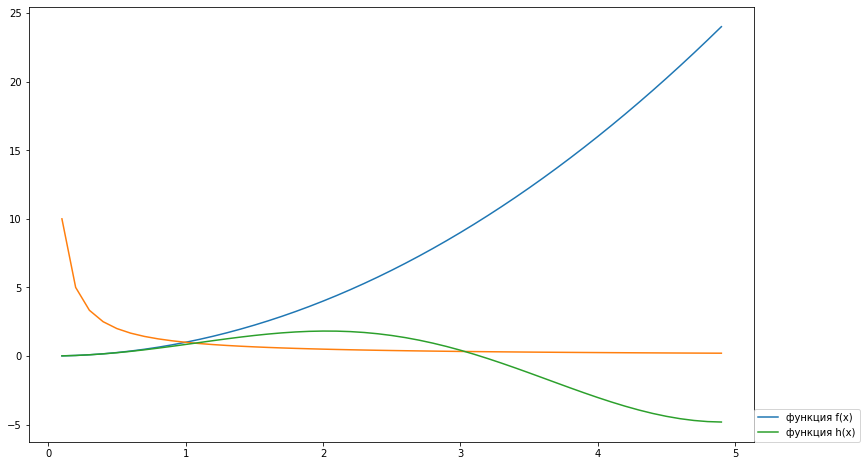

In [43]:
fig, axes = plt.subplots(figsize=(13,8))

axes.plot(x, f(x), label=u'функция f(x)')
axes.plot(x, g(x))
axes.plot(x, h(x), label=u'функция h(x)')
axes.legend(loc = (1, 0))

В подписях поддерживается Latex разметка, что позволяет вам описывать формулы прямо на графике:

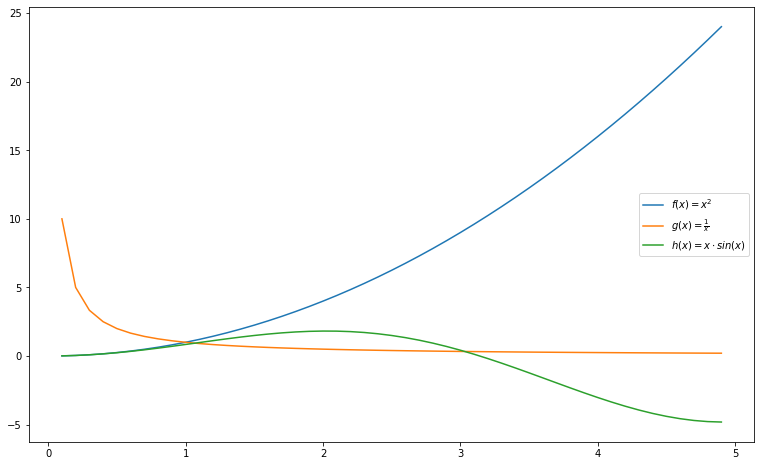

In [44]:
fig, axes = plt.subplots(figsize=(13,8))

axes.plot(x, f(x), label='$f(x) = x^2$')
axes.plot(x, g(x), label='$g(x) = \\frac{1}{x}$')
axes.plot(x, h(x), label='$h(x) = x \\cdot sin(x)$')
axes.legend(loc = 5);

Т.к. шрифт получился мелковат, давайте увеличим его с помощью аргумента fontsize.

Этот аргумент есть как у осей, так у заголовков, легенды и других текстовых полей.

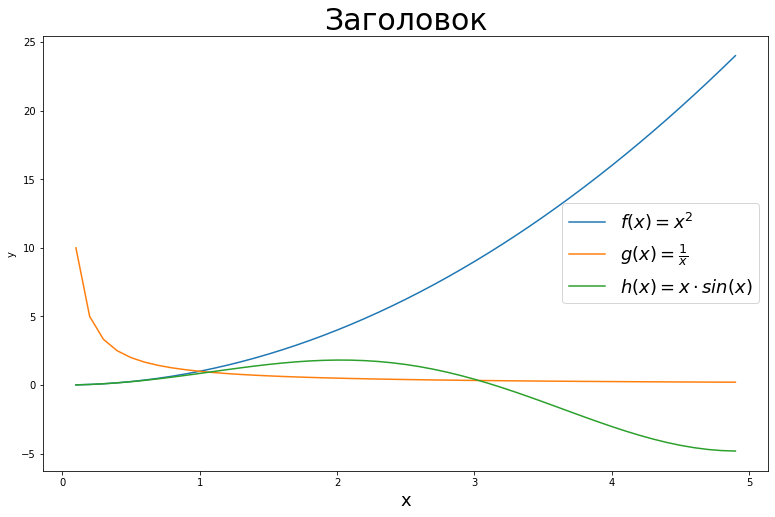

In [72]:
fig, axes = plt.subplots(figsize=(13,8))

axes.plot(x, f(x), label='$f(x) = x^2$')
axes.plot(x, g(x), label='$g(x) = \\frac{1}{x}$')
axes.plot(x, h(x), label='$h(x) = x \\cdot sin(x)$')
axes.set_title(u'Заголовок', fontsize=30)
axes.set_xlabel('x', fontsize=18)
axes.set_ylabel('y')
axes.legend(loc = 5, fontsize=18);

## Стили кривых и маркеры

До сих пор мы либо довольствовались автоматически назначенным цветом для кривой, либо назначали цвет, передавая строку из 1 буквы 3-м параметром (после списка значений аргументов и функций). 

- "g" - зелёный
- "r" - красный
- "y" - жёлтый
- ...

Это похоже на MatLab API.

И тут поддерживается возможность задать стиль кривых:

Text(0, 0.5, 'y')

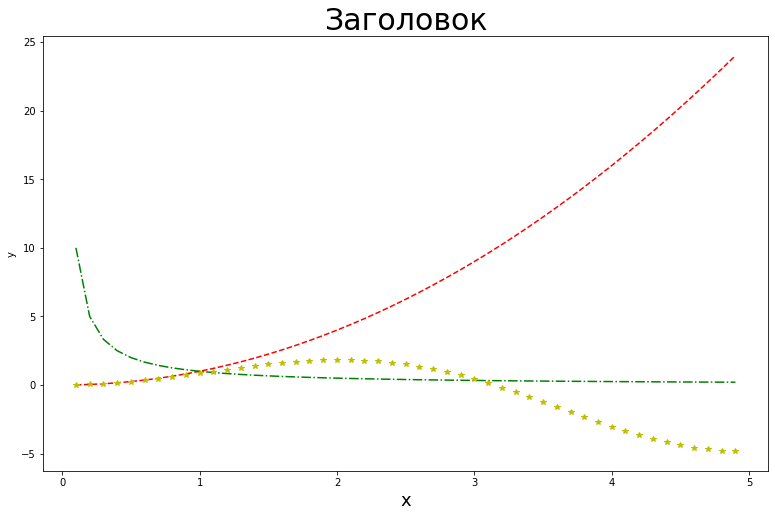

In [45]:
fig, axes = plt.subplots(figsize=(13,8))

axes.plot(x, f(x), 'r--', label='$f(x) = x^2$')
axes.plot(x, g(x), 'g-.', label='$g(x) = \\frac{1}{x}$')
axes.plot(x, h(x), 'y*', label='$h(x) = x \\cdot sin(x)$')
axes.set_title(u'Заголовок', fontsize=30)
axes.set_xlabel('x', fontsize=18)
axes.set_ylabel('y')
 

Так же можно использовать атрибут color и alpha у метода plot для задания цвета и прозрачности кривой.

Задать цвет можно как именем, так и в шестнадцатиричном формате.

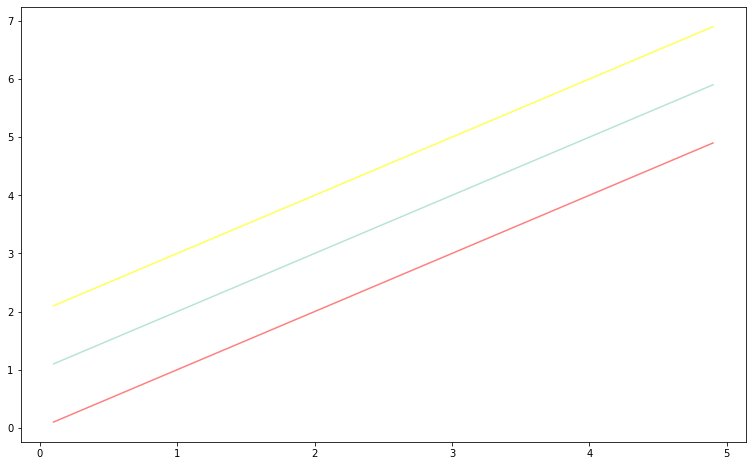

In [74]:
fig, axes = plt.subplots(figsize=(13,8))

axes.plot(x, x, color='red', alpha=0.5)
axes.plot(x, x+1, color='#11AA66', alpha=0.3)
axes.plot(x, x+2, color='#FFFF55')

Так же можно задать 

- толщину линии с помощью linewidth или lw
- стиль линии с помощью linestyle или ls

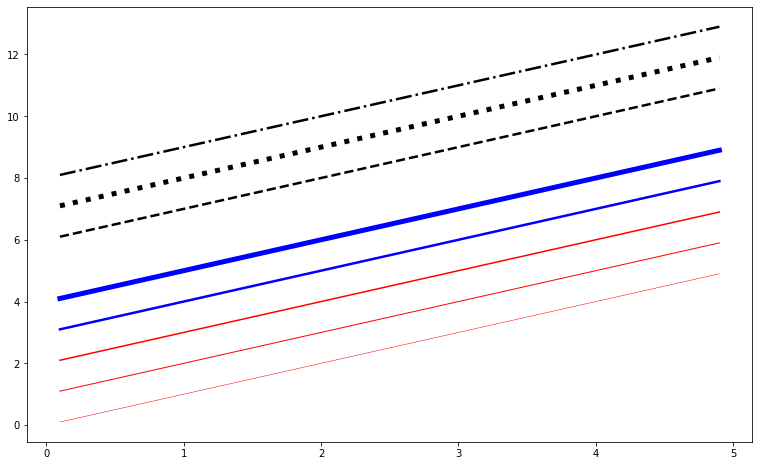

In [46]:
fig, axes = plt.subplots(figsize=(13,8))

axes.plot(x, x, color='red', linewidth=0.5)
axes.plot(x, x+1, color='red', linewidth=1)
axes.plot(x, x+2, color='red', linewidth=1.5)
axes.plot(x, x+3, color='blue', lw=2.5)
axes.plot(x, x+4, color='blue', lw=5)

axes.plot(x, x+6, color='black', linestyle='--', lw=2.5)
axes.plot(x, x+7, color='black', ls=':', lw=5)
axes.plot(x, x+8, color='black', linestyle='-.', lw=2.5)

При необходимости на график можно добавить маркет с помощью атрибута marker 

> Доступные значения: '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...

Независимо от цвета и толщины линии, можно задать размер и цвет маркера с помощью markersize и markerfacecolor, обводку с помощью markeredgewidth и т.п.

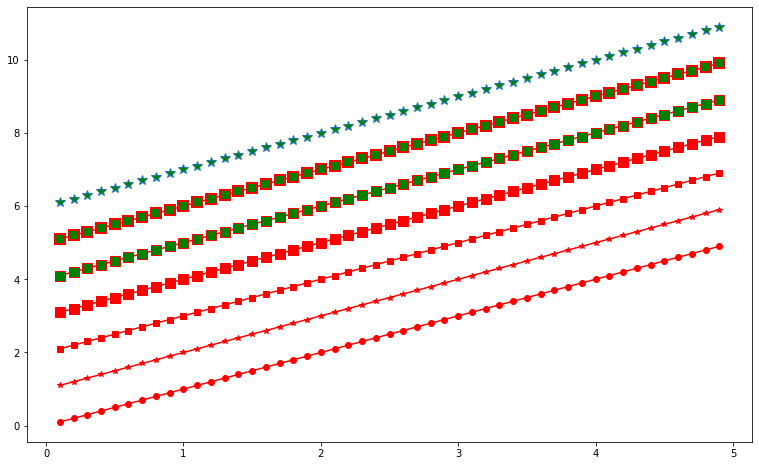

In [76]:
fig, axes = plt.subplots(figsize=(13,8))

axes.plot(x, x, color='red', marker='o')
axes.plot(x, x+1, color='red', marker='*')
axes.plot(x, x+2, color='red', marker='s')
axes.plot(x, x+3, color='red', marker='s', markersize = 10)
axes.plot(x, x+4, color='red', marker='s', markersize = 10, markerfacecolor='green')
axes.plot(x, x+5, color='red', marker='s', markersize = 10, markerfacecolor='green', markeredgewidth=2)
axes.plot(x, x+6, lw=0, marker='*', markerfacecolor='green', markersize = 10)

## Отображение файлов на графиках

Поскольку мы уже умеем сохранять свои графики в файл, то логично, что есть и возможность открыть файл для использования на графике.

Для этого:

1. откроем файл функцией open, не забыва добавить флаг "b" для бинарных файлов вроде jpg, png.

2. считаем файл в переменную с помощью plt.imread

3. отображаем файл с помощью метода imshow. Этот метод работает как для глобального объекта pyplot, так и для каждого объекта осей.

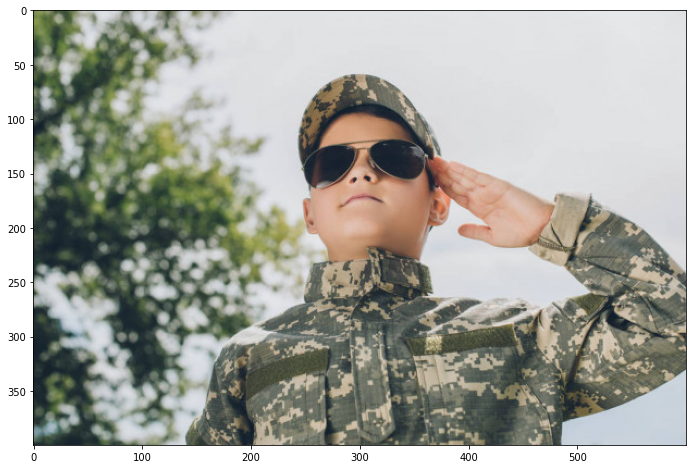

In [47]:
fig = plt.figure(figsize=(13, 8))

with open("img/2.jpg", 'rb') as map_file:
        map_img = plt.imread(map_file)
    
plt.imshow(map_img)
plt.show()

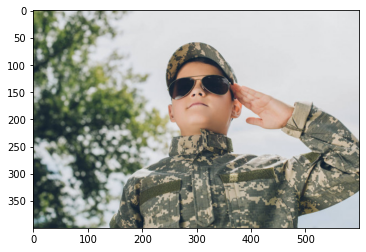

In [48]:
fig, axes = plt.subplots()
with open("img/2.jpg", 'rb') as map_file:
        map_img = plt.imread(map_file)
    
axes.imshow(map_img)
plt.show()

Это может быть нужно для нанесения информации, например, кривых или точек.

Напомним, графики мы строим по точкам. Т.е. если мы передадим списки x и y каждый всего из 1 значения, то это будет 1 точка:

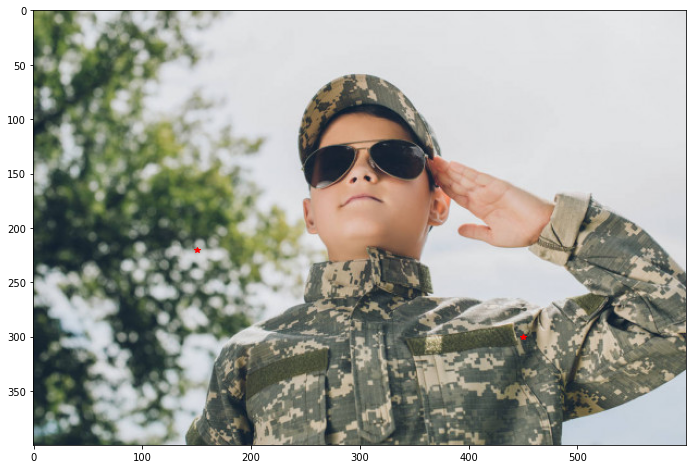

In [49]:
fig = plt.figure(figsize=(13, 8))

with open("img/2.jpg", 'rb') as map_file:        # using 'r' causes Python to crash :(
        map_img = plt.imread(map_file)
        
plt.imshow(map_img)
plt.plot([150, 450], [220, 300], 'r*')
plt.show()

## Контроль за осями

Мы имеем контроль над содержимым каждого объекта осей и можем показывать только то, что необходимо.

- По умолчанию график помещается внутри осей так, чтобы были небольшие поля.

- Методы set_ylim и set_xlim, задают границы осей (чтобы расширить область графика или наоборот обрезать её)


(0.5, 1.5)

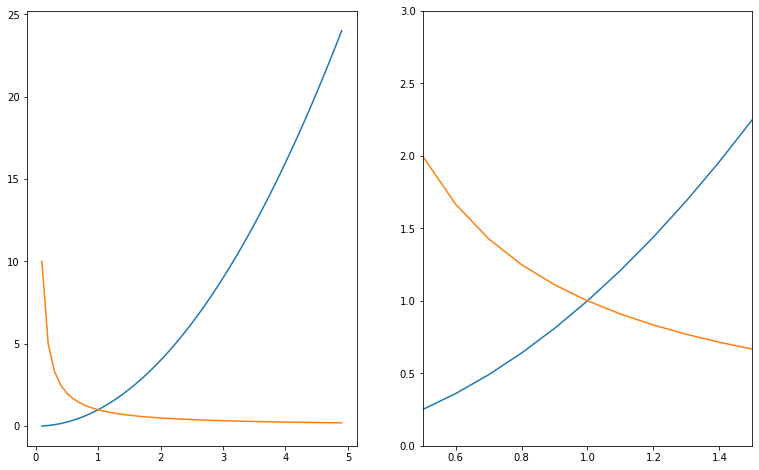

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(13,8))

axes[0].plot(x, f(x), x, g(x))

axes[1].plot(x, f(x), x, g(x))
axes[1].set_ylim(0, 3)
axes[1].set_xlim(0.5, 1.5)

Также возможно установить логарифмическую шкалу для одной или обеих осей. Эта функциональность фактически является лишь одним из применений более общей системы преобразований в Matplotlib. Каждая из шкал осей устанавливается отдельно, используя методы set_xscale и set_yscale, которые принимают один параметр (со значением „log“ в данном случае):

/tmp/ipykernel_32121/4169802991.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


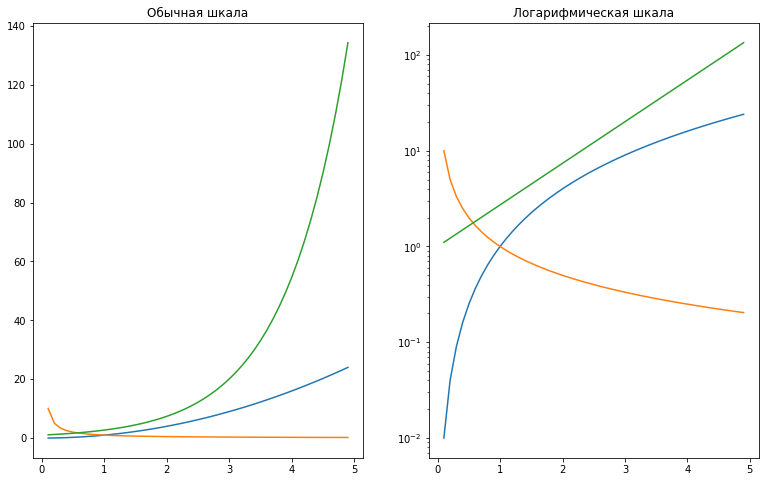

In [51]:
fig, axes = plt.subplots(1, 2,figsize=(13,8))

axes[0].plot(x, f(x), x, g(x), x, np.exp(x))
axes[1].plot(x, f(x), x, g(x), x, np.exp(x))
axes[1].set_yscale("log")

axes[0].set_title(u"Обычная шкала")
axes[1].set_title(u"Логарифмическая шкала")

fig.show()

Мы можем явно задать значения вдоль осей, а не только подписи к ним.
Во-первых, нам понадобятся 2 метода set_xticks и set_yticks. Они задают значения вдоль осей x и y, соответственно. 

Внутрь каждого из них передаётся список значений.

Важно, чтобы значений было не слишком много, но и не слишком мало, иначе часть графика останется без значений вдоль оси, либо наоборот будет много лишних подписей за пределами графика:

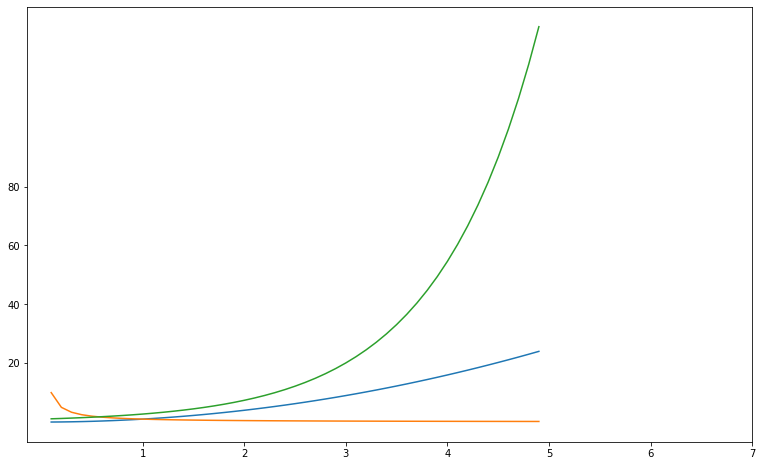

In [44]:
fig, axes = plt.subplots(figsize=(13,8))

axes.plot(x, f(x), x, g(x), x, np.exp(x))

xsticks = [1, 2, 3, 4, 5, 6, 7]
axes.set_xticks(xsticks) 

ysticks = [20, 40, 60, 80]
axes.set_yticks(ysticks) 

А если мы хотим заменить числовые значения на произвольные строчные, то можно использовать set_xticklabels и set_yticklabels.

Тут есть ряд преимуществ:

1. можно использовать fontsize для задания размера шрифта

2. поддерживается Latex и кириллица с теми же особенностями, как и в заголовках, например:
___

- символ $ для Latex

- символ \ надо экранировать им же

- либо перед строкой поставить литерал r (чтобы превратить строку в "сырую", т.е. игнорирующую спец-символы)

[Text(0, 20, '20.0000'),
 Text(0, 40, '40.0000'),
 Text(0, 60, '60.0000'),
 Text(0, 80, '80.0000'),
 Text(0, 100, '100.0000'),
 Text(0, 120, '120.0000'),
 Text(0, 140, '140.0000'),
 Text(0, 160, '160.0000')]

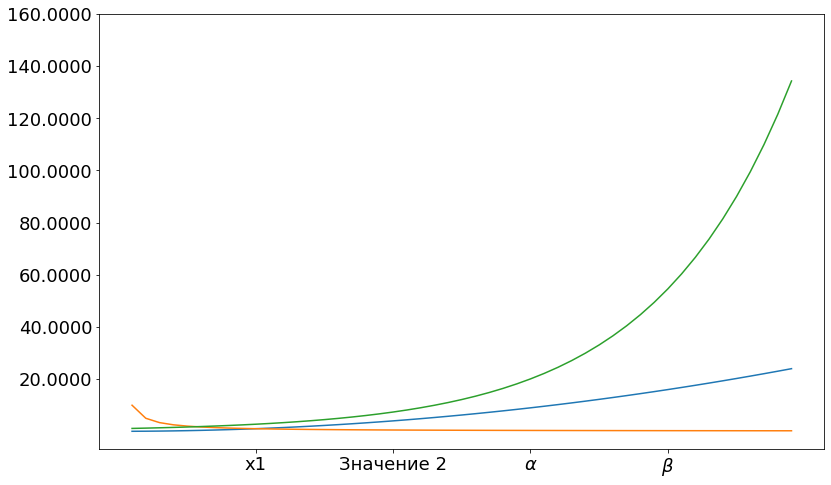

In [81]:
fig, axes = plt.subplots(figsize=(13,8))

axes.plot(x, f(x), x, g(x), x, np.exp(x))

xsticks = [1, 2, 3, 4]
axes.set_xticks(xsticks) 
axes.set_xticklabels(['x1', u'Значение 2', r'$\alpha$', '$\\beta$'], fontsize=18)

ysticks = [20, 40, 60, 80, 100, 120, 140, 160]
axes.set_yticks (ysticks) 
axes.set_yticklabels(['{:.4f}'.format(y) for y in ysticks],  fontsize = 18 )

*Обратите внимание на использование list comprehension и функции format сразу внутри set_yticklabels*

Иногда для очень больших значений нужна более специфичная, научная запись с указанием общей степени для всех значений вдоль оси.

Воспользуемся для этого подмодулем ticker:

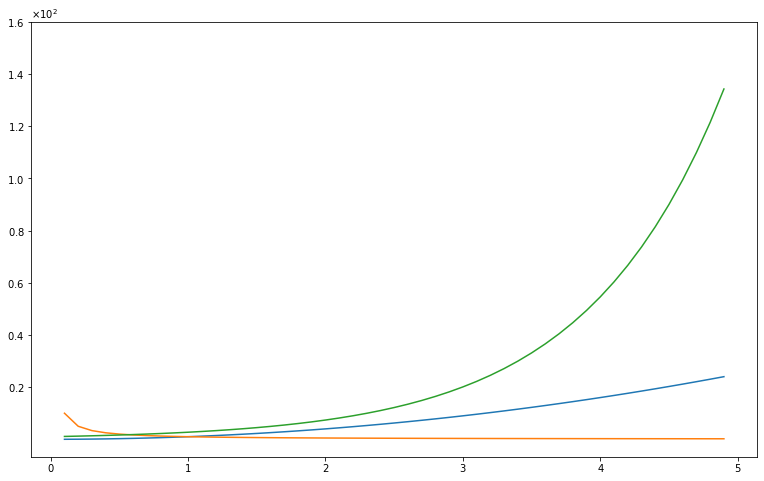

In [53]:
fig, axes = plt.subplots(figsize=(13,8))

axes.plot(x, f(x), x, g(x), x, np.exp(x))

ysticks = [20, 40, 60, 80, 100, 120, 140, 160]
axes.set_yticks(ysticks) 

from matplotlib import ticker

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1, 1)) 
axes.yaxis.set_major_formatter(formatter) 

Первый способ перебивает настройки второго локально:

Text(0, 0.5, 'y')

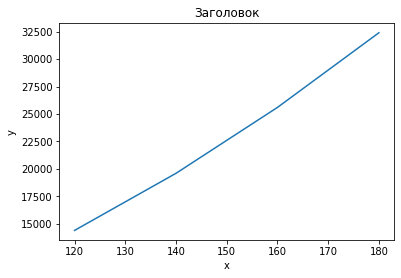

In [63]:
x = np.array([120, 140, 160 , 180])
y = x ** 2

fig, axes = plt.subplots()
axes.plot(x, y)
axes.set_title(u'Заголовок')
axes.set_xlabel('x')
axes.set_ylabel('y')
#axes.tick_params(axis='y', pad=150)

In [61]:
import matplotlib

Вернём значения по умолчанию

In [62]:
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

### Темы оформления

In [64]:
!pip install mplcyberpunk

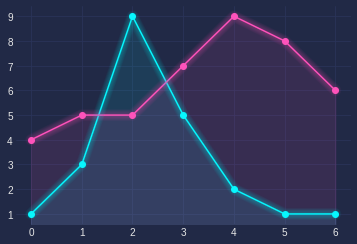

In [65]:
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='o')

mplcyberpunk.add_glow_effects()

plt.show()

https://github.com/dhaitz/mplcyberpunk